In [1]:
!pip install sktime
!pip install yfinance

     |████████████████████████████████| 5.7MB 11.6MB/s 
     |████████████████████████████████| 22.3MB 1.3MB/s 
     |████████████████████████████████| 9.5MB 42.3MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
     |████████████████████████████████| 5.5MB 19.0MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23442 sha256=eee08160f64e6d61f1aa91891b36ef076325d6c85d3a061bfabd945bef981cd2
  Stored in directory: /root/.cache/pip/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [10]:
from sktime.datasets import load_airline
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.theta import ThetaForecaster
from sktime.performance_metrics.forecasting import smape_loss
from sktime.utils.plotting import plot_series

In [3]:
#Data
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import *
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#Create csv for data by the day for past 10 years for AAPL
import pandas as pd
import yfinance as y
import pandas as pd
import tensorflow as tf
import sklearn
from sklearn.model_selection import *
from sklearn.decomposition import *
from pandas_datareader import data as pdr

tickers = "AAPL"

y.pdr_override()
apple = pdr.get_data_yahoo(tickers = tickers, period = "max", interval = "1d", auto_adjust = True, prepost = False)

apple = pd.DataFrame(apple)
print(apple['Open'].count())

apple_train = pd.DataFrame(apple[0:8132])
apple_test = pd.DataFrame(apple[8132:])

apple_train.to_csv(tickers + "_min_train.csv")
apple_test.to_csv(tickers + "_min_test.csv") 

[*********************100%***********************]  1 of 1 completed
10166


(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fbccbe7cb90>)

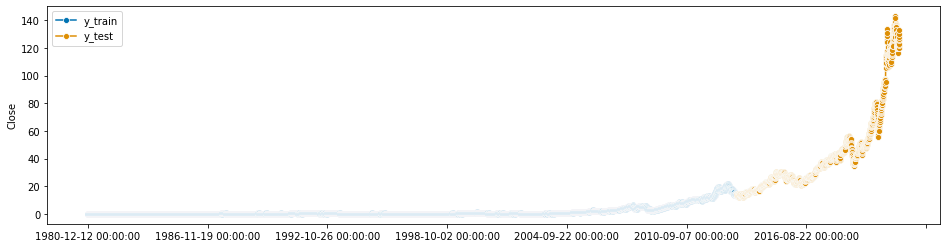

In [11]:
#Forecasting

#y = load_airline()
#y_train, y_test = temporal_train_test_split(y)

y_train = apple_train['Close']
y_test = apple_test['Close']
plot_series(y_train, y_test, labels=["y_train", "y_test"])

In [14]:
fh = ForecastingHorizon(y_test.index, is_relative=False)
forecaster = ThetaForecaster(sp = 12)  # monthly seasonal periodicity
forecaster.fit(y = pd.Series(y_train))
y_pred = forecaster.predict(fh)
smape_loss(y_test, y_pred)

ValueError: ignored